<a href="https://colab.research.google.com/github/karanbhatt1/DeepLearningModels/blob/main/Fashion_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Train images dimensions: {train_images.shape}")
print(f"Test images dimensions: {test_images.shape}")

In [ ]:
figure , axs = plt.subplots(5,1, figsize=(10,10))
for i in range(5):
  axs[i].set_title(f"Label: {train_labels[i]}")
  axs[i].imshow(train_images[i], cmap='gray')
  axs[i].axis('off')
plt.show()


In [ ]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [ ]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [ ]:
train_images.shape

In [ ]:
# model Building:

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.models as models
import tensorflow.keras.regularizers as rg

In [ ]:
# converting to categories:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
def create_Model():
  model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(64, 3, activation="relu",kernel_regularizer = rg.l2(0.001)),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation="relu",kernel_regularizer = rg.l2(0.001)),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation="relu",kernel_regularizer = rg.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
  ])

  return model


In [ ]:
mod_1 = create_Model()

In [ ]:
mod_1.summary()

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
mod_1.compile(
    optimizer = opt,
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
# training :

In [ ]:
tr_mod_1 = mod_1.fit(
    train_images,
    train_labels,
    batch_size = 128,
    epochs = 10,
)

In [ ]:
tr_mod_1.history

In [ ]:
plt.plot(tr_mod_1.history['accuracy'])
plt.plot(tr_mod_1.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='best')
plt.show()

In [ ]:
test_mod_1 = mod_1.evaluate(test_images, test_labels)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
test_labels

In [ ]:
y_pred_probs = mod_1.predict(test_images)
y_true_labels = np.argmax(test_labels, axis=1)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
a_s_c = accuracy_score(y_true_labels, y_pred_labels)

In [ ]:
a_s_c

In [ ]:
a_s_c*100

In [45]:
print(f"The accuracy of the model is:{a_s_c*100}")

The accuracy of the model is:87.7


In [46]:
cll_rpt = classification_report(y_true_labels, y_pred_labels)

In [47]:
matr = confusion_matrix(y_true_labels, y_pred_labels)

In [48]:
matr

array([[875,   0,   8,  15,   5,   1,  87,   0,   9,   0],
       [  2, 971,   0,  19,   3,   1,   2,   0,   2,   0],
       [ 14,   1, 692,   9, 130,   0, 150,   0,   4,   0],
       [ 27,   5,   7, 880,  36,   0,  42,   0,   3,   0],
       [  1,   1,  18,  28, 855,   0,  94,   0,   3,   0],
       [  0,   0,   0,   1,   0, 968,   0,  19,   0,  12],
       [175,   1,  39,  17,  97,   0, 657,   0,  14,   0],
       [  0,   0,   0,   0,   0,  26,   0, 920,   0,  54],
       [  2,   1,   2,   3,   3,   2,   6,   4, 977,   0],
       [  0,   0,   0,   0,   0,   3,   0,  21,   1, 975]])

<Axes: >

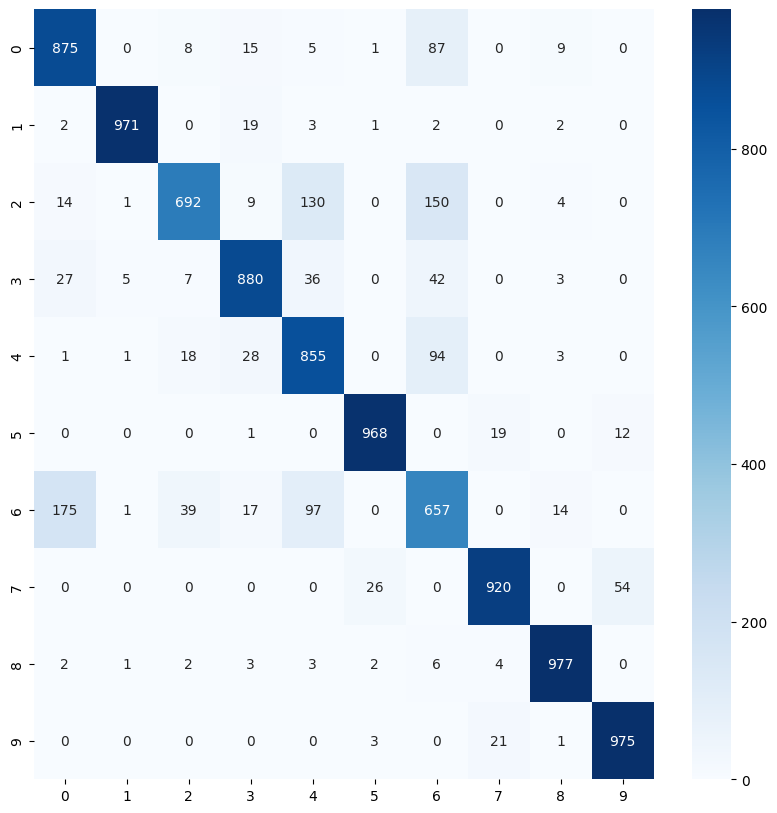

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(matr, annot=True, fmt='d', cmap='Blues')